# 3-Day Outbreak Simulator

In [1]:
from SpatialScan.region import *
from SpatialScan.likelihood import *
from SpatialScan.results import *
from SpatialScan.scan import *
from SpatialScan.synthetic import *
from SpatialScan.timeseries import *
from SpatialScan.preprocessing import *

import pandas as pd

## Set Model Parameters

In [2]:
# Set these Variables First
OUTBREAK_LENGTH=3
NORMAL_ANALYSIS_DAYS=1
DAYS_IN_PAST=14
DAYS_IN_FUTURE=2

LON_MIN = -0.349749335498348
LON_MAX = -0.25056950567589603
LAT_MIN = 51.45083323706079
LAT_MAX = 51.5408981075881

## Get Synthetic data from File

In [3]:
synth_df = pd.read_csv("../data/simulation/synthetic_scoot_april_june.csv", infer_datetime_format=True, parse_dates=[1, 4])
synth_df = synth_df[(synth_df['lon'].between(LON_MIN, LON_MAX)) & (synth_df['lat'].between(LAT_MIN, LAT_MAX))]

In [4]:
total_days_of_required_data = OUTBREAK_LENGTH + NORMAL_ANALYSIS_DAYS + DAYS_IN_PAST

In [5]:
t_min = synth_df['measurement_end_utc'].max() - np.timedelta64(total_days_of_required_data, 'D')
forecast_start = t_min + np.timedelta64(DAYS_IN_PAST, 'D')
first_analysis_day = forecast_start + np.timedelta64(DAYS_IN_FUTURE, 'D')
synth_df = synth_df[synth_df['measurement_start_utc'] >= t_min].copy()

Now have 34 days worth of data in Ealing

In [6]:
synth_df

detector_id measurement_end_utc       lon        lat  \
1032     N24/002b1 2020-05-18 01:00:00 -0.285622  51.462133   
1033     N24/002b1 2020-05-18 02:00:00 -0.285622  51.462133   
1034     N24/002b1 2020-05-18 03:00:00 -0.285622  51.462133   
1035     N24/002b1 2020-05-18 04:00:00 -0.285622  51.462133   
1036     N24/002b1 2020-05-18 05:00:00 -0.285622  51.462133   
...            ...                 ...       ...        ...   
671971   N28/140g1 2020-06-04 20:00:00 -0.276751  51.538122   
671972   N28/140g1 2020-06-04 21:00:00 -0.276751  51.538122   
671973   N28/140g1 2020-06-04 22:00:00 -0.276751  51.538122   
671974   N28/140g1 2020-06-04 23:00:00 -0.276751  51.538122   
671975   N28/140g1 2020-06-05 00:00:00 -0.276751  51.538122   

       measurement_start_utc  n_vehicles_in_interval  rolling_threshold  \
1032     2020-05-18 00:00:00                       4         382.926538   
1033     2020-05-18 01:00:00                       7         380.898881   
1034     2020-05-18 02:00:00                      33         377.768647   
1035     2020-05-18 03:00:00                       0         376.888537   
1036     2020-05-18 04:00:00                      84         373.296586   
...                      ...                     ...                ...   
671971   2020-06-04 19:00:00                     404        1339.610887   
671972   2020-06-04 20:00:00                     255        1337.103390   
671973   2020-06-04 21:00:00                      26        1340.919715   
671974   2020-06-04 22:00:00                     126        1343.364932   
671975   2020-06-04 23:00:00                      24        1340.796783   

        global_threshold  Num_Anom  Num_Missing  
1032          308.356339       0.0           10  
1033          308.356339       0.0           10  
1034          308.356339       0.0           10  
1035          308.356339       0.0           10  
1036          308.356339       0.0           10  
...                  ...       ...          ...  
671971        972.069431       0.0            4  
671972        972.069431       0.0            4  
671973        972.069431       0.0            4  
671974        972.069431       0.0            4  
671975        972.069431       0.0            4  

[197856 rows x 10 columns]

## Simulate an Outbreak which lasts for the last `OUTBREAK_LENGTH` days

Simulate an outbreak for the last 3

In [7]:
outbreak_df, outbreak_detectors, outbreak_start = simulate_outbreak(synth_df, severity=50, k_min=25, k_max=100, outbreak_duration=OUTBREAK_LENGTH)

Outbreak centred at (-0.295034837756049, 51.5321338356957) affecting 74 detectors
['N27/130b1' 'N27/101q1' 'N27/102b1' 'N27/101c1' 'N27/101a1' 'N27/101a2'
 'N27/102a1' 'N27/101b2' 'N27/101b1' 'N27/102x2' 'N27/100c1' 'N27/100x1'
 'N27/004b1' 'N27/100b1' 'N27/100s1' 'N27/004a1' 'N27/130a1' 'N27/130a2'
 'N27/004x2' 'N27/102c2' 'N27/004f3' 'N27/004g1' 'N27/004g2' 'N27/004f1'
 'N27/004f2' 'N27/010d1' 'N27/093e1' 'N27/010c1' 'N27/245b1' 'N27/011a1'
 'N27/018b1' 'N27/247x1' 'N27/169a1' 'N27/018e1' 'N28/140g1' 'N27/247a1'
 'N27/071a1' 'N27/018f1' 'N27/247f1' 'N27/247e1' 'N27/090b1' 'N27/169b1'
 'N27/011d1' 'N27/093g1' 'N27/018d1' 'N27/169c1' 'N27/219b1' 'N27/219b2'
 'N27/044c1' 'N27/011h1' 'N27/044e1' 'N27/044b1' 'N27/090a1' 'N27/044h1'
 'N27/228a1' 'N27/011f1' 'N27/019d1' 'N27/044a1' 'N27/011b1' 'N27/058b1'
 'N27/019b1' 'N27/019a1' 'N27/227a1' 'N27/227b1' 'N27/299a1' 'N27/227q1'
 'N27/227n1' 'N27/227p1' 'N27/123c1' 'N27/058a1' 'N27/156g1' 'N27/156g2'
 'N27/123z1' 'N27/122c1']
Start of outbrea

Text(2020-06-03 00:00:00, 1500, 'Analysis Begins')

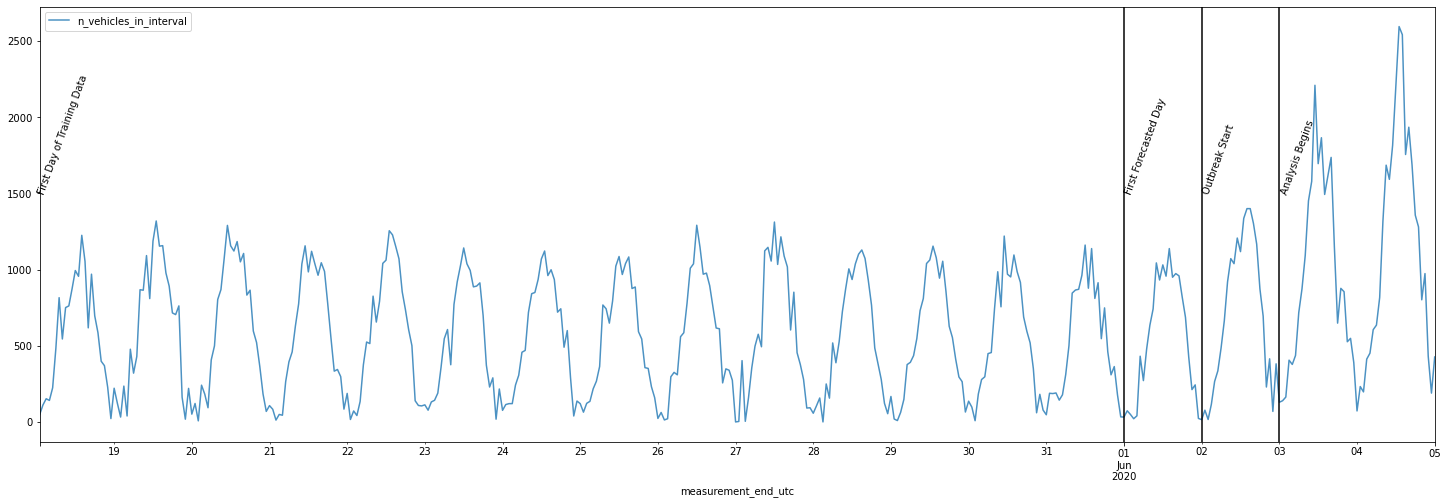

In [8]:
outbreak_df[outbreak_df['detector_id'] == 'N27/011a1'].plot(x='measurement_end_utc', y='n_vehicles_in_interval', figsize=(25, 8), alpha=0.8)
plt.axvline(x=outbreak_start, c='k')
plt.text(outbreak_start,1500,'Outbreak Start',rotation=70, size=10)

plt.axvline(x=t_min, c='k')
plt.text(t_min,1500,'First Day of Training Data',rotation=70, size=10)

plt.axvline(x=forecast_start, c='k')
plt.text(forecast_start ,1500,'First Forecasted Day',rotation=70, size=10)

plt.axvline(x=first_analysis_day, c='k')
plt.text(first_analysis_day,1500,'Analysis Begins',rotation=70, size=10)

Run Scans over the 34 - 28 = 6 days, looking one day back each time, using the method prescribed.

Total number of days in dataframe:  18
Producing forecasts and scans for 3 days in total.


Analysis day: 2020-06-03 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-18 00:00:00 to 2020-06-03 00:00:00.
Using data from 2020-05-18 00:00:00 to 2020-06-01 00:00:00, to forecast counts  between 2020-06-01 00:00:00 and 2020-06-03 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


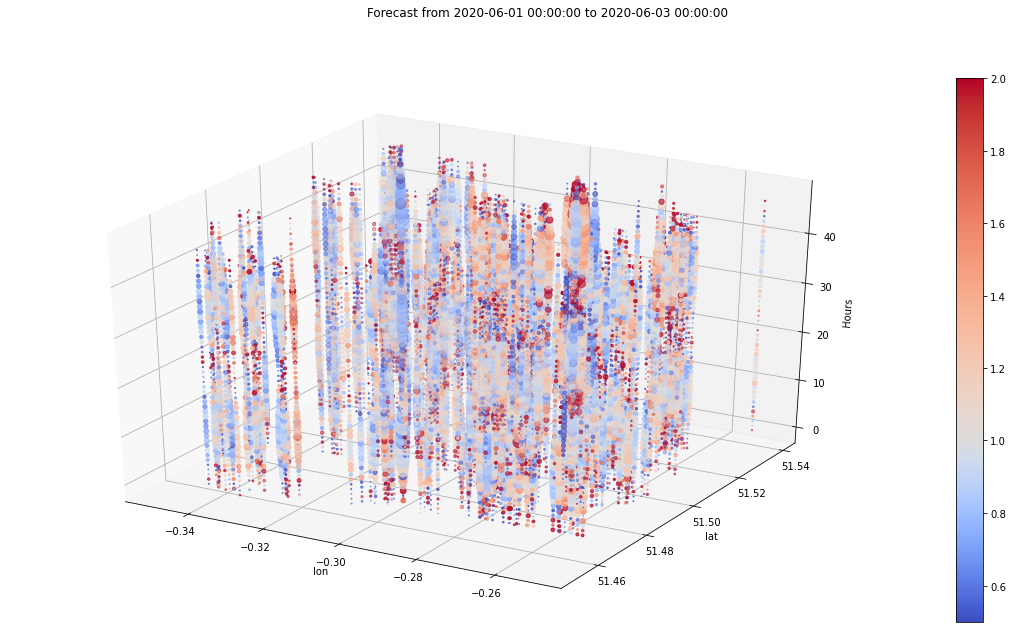

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.08 seconds
Search spatial regions with t_min = 2020-06-01 00:00:00 and t_max = 2020-06-03 00:00:00
No Outbreak Posterior: 0.9934685857804243
Total Outbreak Posterior: 0.0065314142195757865

32448 space-time regions searched in 92.19 seconds
Total run time: 100.27 seconds


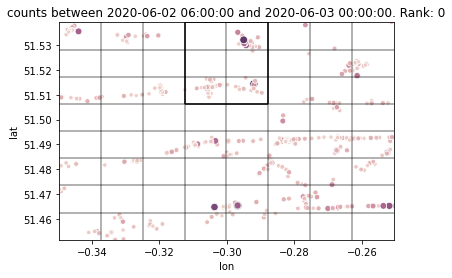


Analysis day: 2020-06-04 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-18 00:00:00 to 2020-06-04 00:00:00.
Using data from 2020-05-19 00:00:00 to 2020-06-02 00:00:00, to forecast counts  between 2020-06-02 00:00:00 and 2020-06-04 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


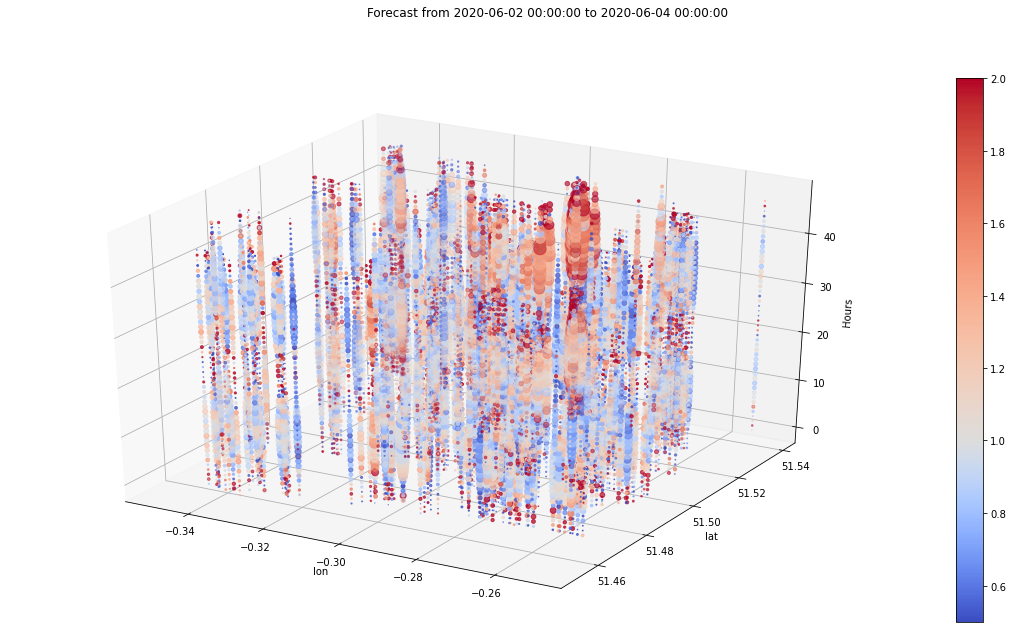

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.00 seconds
Search spatial regions with t_min = 2020-06-02 00:00:00 and t_max = 2020-06-04 00:00:00
No Outbreak Posterior: 0.9934505572906026
Total Outbreak Posterior: 0.00654944270939744

32448 space-time regions searched in 91.34 seconds
Total run time: 99.34 seconds


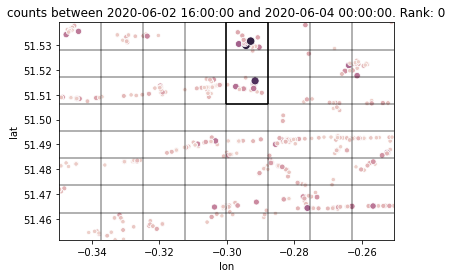


Analysis day: 2020-06-05 00:00:00. Looking back at last 48 hours.
Input dataframe contains data spanning 2020-05-18 00:00:00 to 2020-06-05 00:00:00.
Using data from 2020-05-20 00:00:00 to 2020-06-03 00:00:00, to forecast counts  between 2020-06-03 00:00:00 and 2020-06-05 00:00:00 for 458 detectors using HW method...
Forecasting complete.
Dates in datetime format. Moving to next stage.

0 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

All baseline predictions >= 0.

Data cleansing complete. 0 rows removed from dataframe.


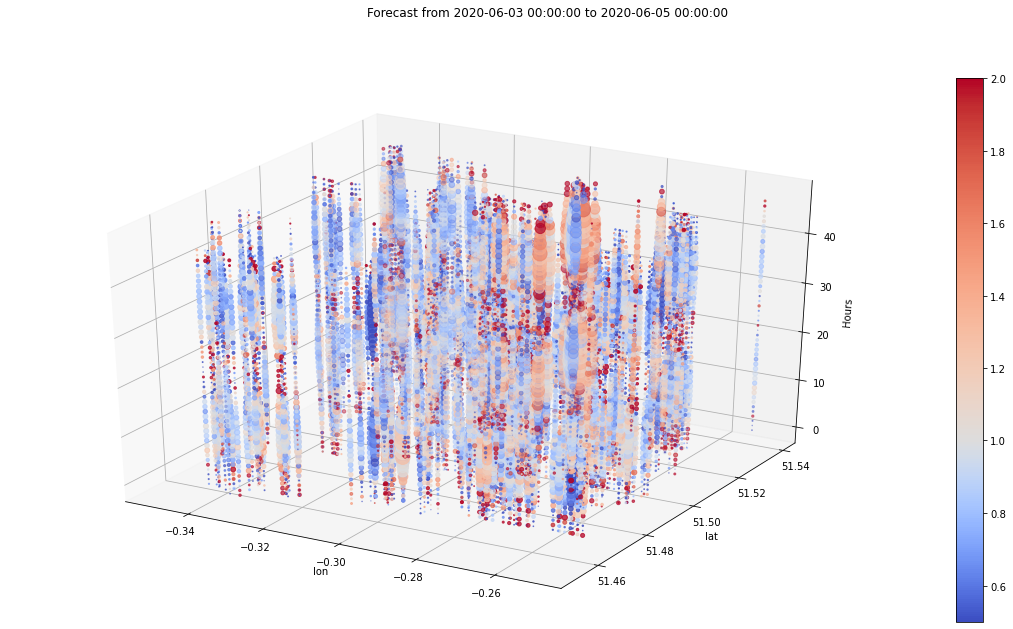

Aggregating data from detector level to grid level.
Beginning normal scan. Setup Time: 8.16 seconds
Search spatial regions with t_min = 2020-06-03 00:00:00 and t_max = 2020-06-05 00:00:00
No Outbreak Posterior: 0.9933522605007105
Total Outbreak Posterior: 0.006647739499289542

32448 space-time regions searched in 98.54 seconds
Total run time: 106.70 seconds


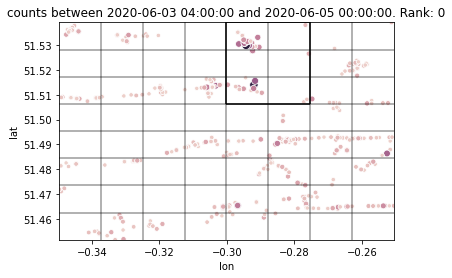

In [9]:
database_results, highest_regions = results_builder(outbreak_df, outbreak_detectors, days_in_past=DAYS_IN_PAST, days_in_future=DAYS_IN_FUTURE, method='HW', grid_partition=8, scan_type='normal')

In [10]:
database_results

start_time_utc end_time_utc  point_id     x_min     x_max  \
0    2020-06-01 00:00:00   2020-06-03         0 -0.349749 -0.337352   
1    2020-06-01 00:00:00   2020-06-03         1 -0.337352 -0.324954   
2    2020-06-01 00:00:00   2020-06-03         2 -0.324954 -0.312557   
3    2020-06-01 00:00:00   2020-06-03         3 -0.312557 -0.300159   
4    2020-06-01 00:00:00   2020-06-03         4 -0.300159 -0.287762   
...                  ...          ...       ...       ...       ...   
6139 2020-06-04 23:00:00   2020-06-05        59 -0.312557 -0.300159   
6140 2020-06-04 23:00:00   2020-06-05        60 -0.300159 -0.287762   
6141 2020-06-04 23:00:00   2020-06-05        61 -0.287762 -0.275364   
6142 2020-06-04 23:00:00   2020-06-05        62 -0.275364 -0.262967   
6143 2020-06-04 23:00:00   2020-06-05        63 -0.262967 -0.250570   

          y_min      y_max  observed_count  forecasted_count  \
0     51.451503  51.462464        4.819801          4.980578   
1     51.451503  51.462464       10.331612         10.578985   
2     51.451503  51.462464       15.235182         15.645637   
3     51.451503  51.462464       20.888354         21.501587   
4     51.451503  51.462464       26.150116         27.114865   
...         ...        ...             ...               ...   
6139  51.528227  51.539188        0.130178          0.111815   
6140  51.528227  51.539188        0.183124          0.148237   
6141  51.528227  51.539188        0.117862          0.100109   
6142  51.528227  51.539188        0.068070          0.064156   
6143  51.528227  51.539188        0.030140          0.031179   

      av_lhd_score_EBP  av_lhd_score_eps_000  av_lhd_score_eps_025  \
0             1.000000             -0.000047             -0.008303   
1             1.000000             -0.000012             -0.009143   
2             1.000000             -0.000043             -0.010364   
3             1.000002             -0.000084             -0.012391   
4             1.000001             -0.000200             -0.015908   
...                ...                   ...                   ...   
6139          1.000062              0.000110             -0.000022   
6140          1.000103              0.000183              0.000017   
6141          1.000063              0.000108             -0.000016   
6142          1.000028              0.000038             -0.000062   
6143          1.000011              0.000009             -0.000073   

      av_lhd_score_eps_050  av_posterior_bbayes  
0                -0.027322         2.202852e-07  
1                -0.031199         2.201383e-07  
2                -0.034680         2.178290e-07  
3                -0.040633         2.141572e-07  
4                -0.050031         2.097069e-07  
...                    ...                  ...  
6139             -0.000096         1.997386e-07  
6140             -0.000039         1.854791e-07  
6141             -0.000080         1.956736e-07  
6142             -0.000150         2.104097e-07  
6143             -0.000181         2.057505e-07  

[6144 rows x 14 columns]

In [11]:
highest_regions

x_min     x_max      y_min      y_max               t_min      t_max  \
0 -0.312557 -0.287762  51.506306  51.539188 2020-06-02 06:00:00 2020-06-03   
1 -0.300159 -0.287762  51.506306  51.539188 2020-06-02 16:00:00 2020-06-04   
2 -0.300159 -0.275364  51.506306  51.539188 2020-06-03 04:00:00 2020-06-05   

   l_score_EBP  l_score_000  l_score_025  l_score_050  posterior_bbayes  \
0     1.002141     0.003409    -0.002002    -0.017879      2.209157e-07   
1     1.023023     0.026467     0.002887    -0.001609      2.149046e-07   
2     1.002648     0.014513    -0.000743    -0.023361      2.067309e-07   

   precision    recall        day  
0   1.000000  0.891892 2020-06-03  
1   1.000000  0.527027 2020-06-04  
2   0.954545  0.567568 2020-06-05

In [12]:
#highest_regions.to_csv('highest.csv', index=False)

In [13]:
#outbreak_df.to_csv('outbreak.csv', index=False)

In [14]:
#outbreak_detectors.to_csv('outbreak_detectors.csv', index=False)

In [15]:
#database_results.to_csv('database_results.csv', index=False)

Dataframe contains data from the database spanning 2020-06-01 00:00:00 to 2020-06-05 00:00:00.


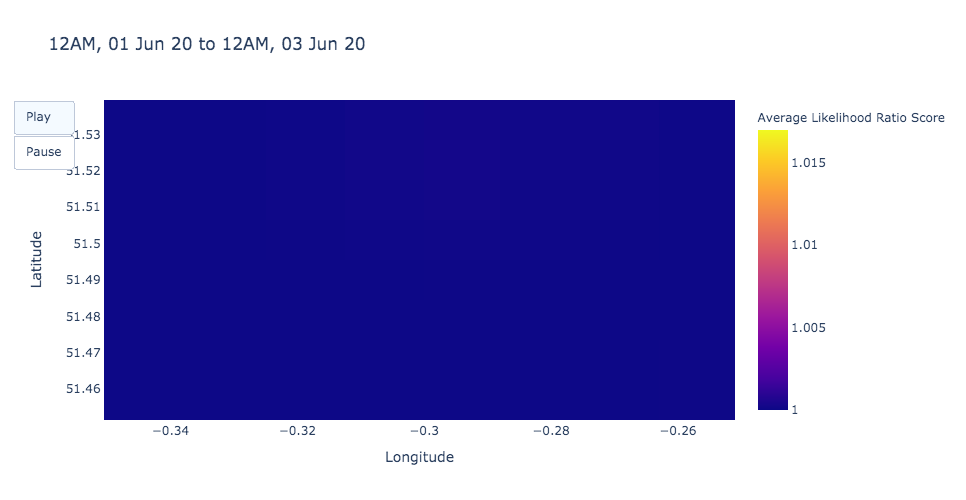

{'max': 1.0169993134127262, 'min': 1.0}

In [16]:
visualise_results_from_database(database_results)